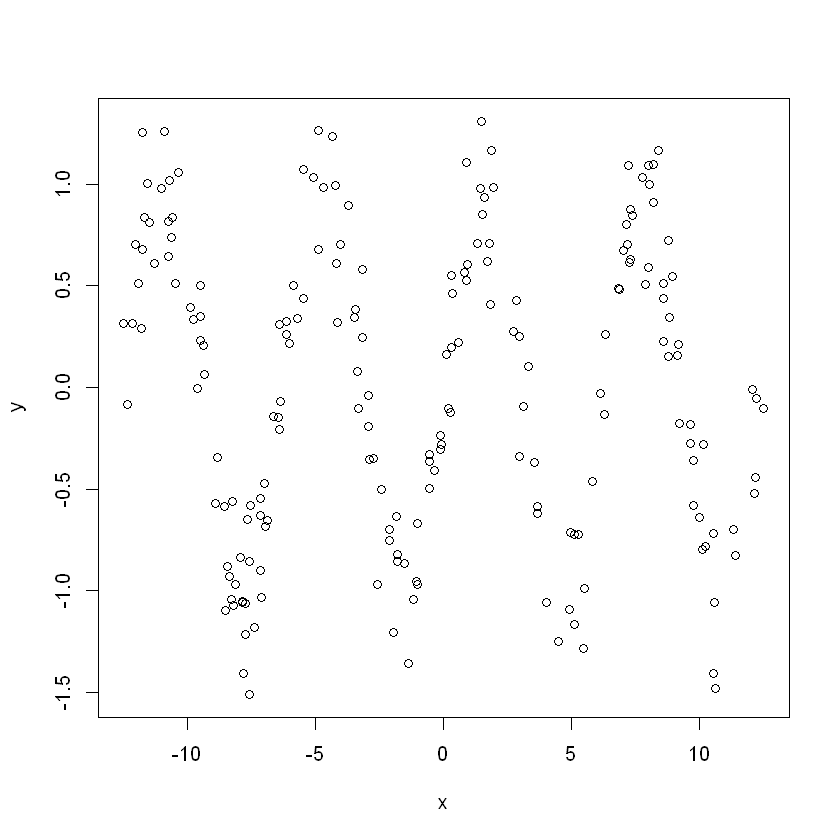

In [20]:
x = sort(runif(200,-4*pi,4*pi))
y = sin(x)+rnorm(200,0,.25)
plot(x,y)

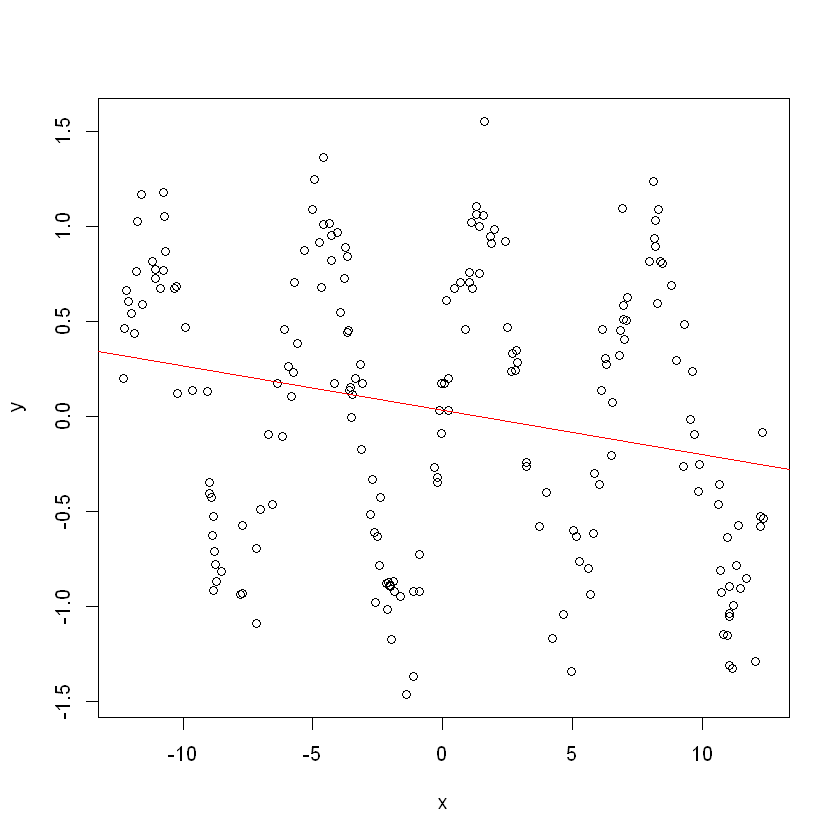

In [6]:
mod = lm(y~x)
plot(x,y)
abline(coef=coef(mod),col='red')

[1] 200  11

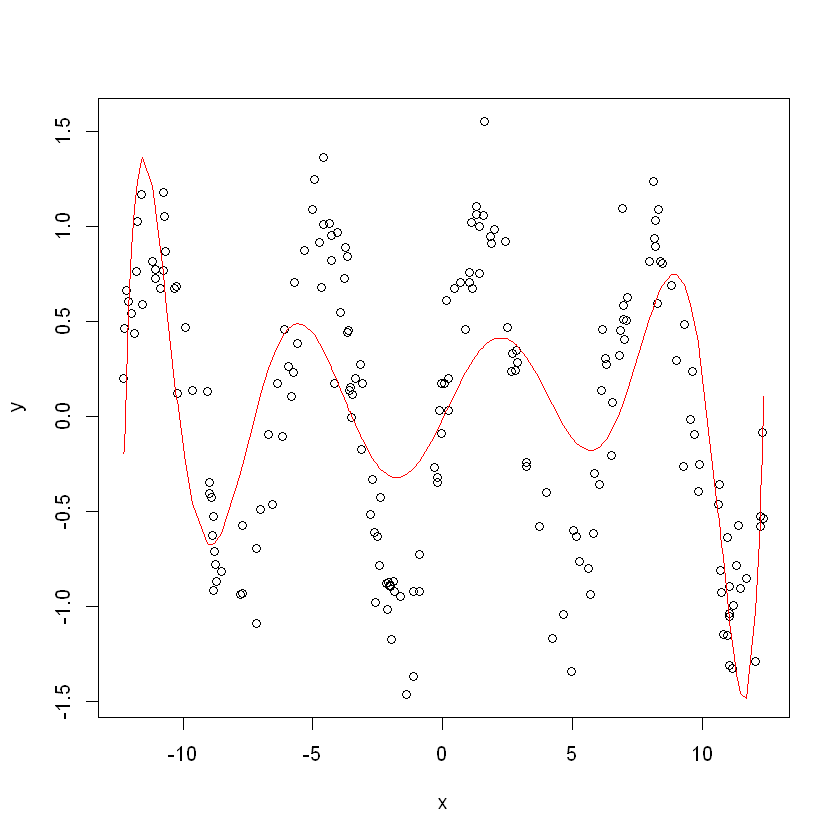

In [7]:
mod = lm(y~x+I(x^2)+I(x^3)+I(x^4)+I(x^5)+I(x^6)+I(x^7)+I(x^8)+I(x^9)+I(x^10))
dim(model.matrix(mod))
plot(x,y)
lines(x,predict(mod,data.frame(x)),col='red')

In [8]:
library('locpol')

In [9]:
?locPolSmootherC

locpolSmoothers {locpol},R Documentation
x,x covariate data values.
y,y response data values.
xeval,Vector of evaluation points.
bw,"Smoothing parameter, bandwidth."
kernel,"Kernel used to perform the estimation, see Kernels"
weig,Vector of weights for observations.
deg,Local polynomial estimation degree (p).
DET,Boolean to ask for the computation of the determinant if the matrix X^TWX.
x,Evaluation points.
"beta0, beta1, beta2,...","Estimation of the i-th derivative of the regression function (m^{(i)}(x)) for i=0,1,...."


In [10]:
?Kernels

Kernels {locpol},R Documentation
x,Numeric vector o value.


$$gaussK(x) = \exp(-x^2/\gamma)$$

In [11]:
smoothed = locPolSmootherC(x=x,y=y,xeval=x,deg=0,kernel=gaussK,bw=.1)

In [12]:
head(smoothed)

,x,beta0
,<dbl>,<dbl>
1,-12.27908,0.4304499
2,-12.27649,0.4322236
3,-12.19712,0.4951064
4,-12.09359,0.5622538
5,-11.97679,0.5745121
6,-11.87067,0.6652632


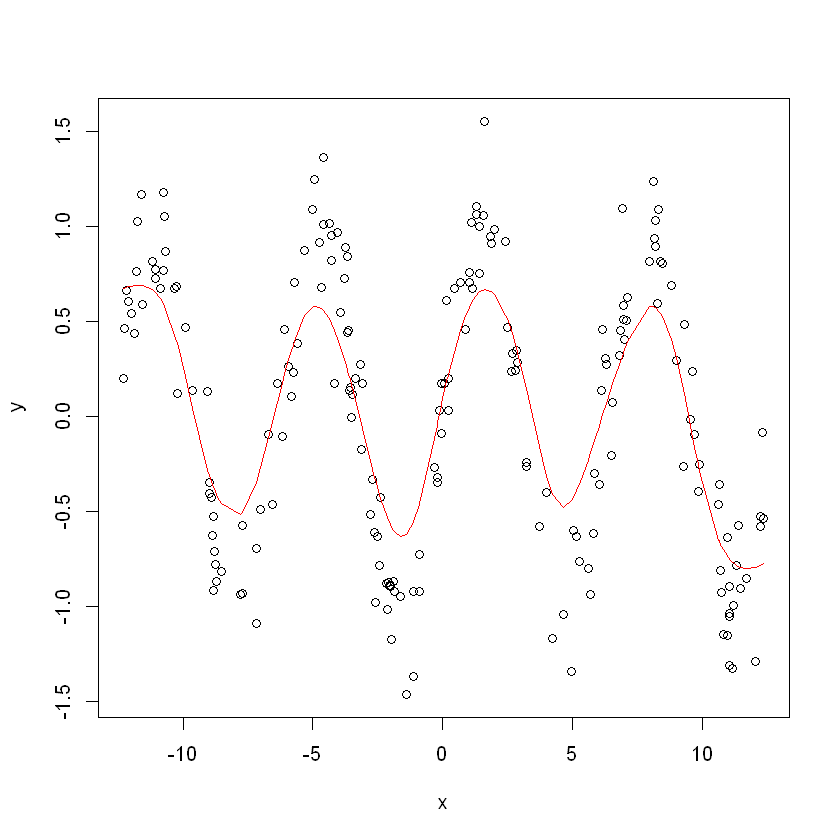

In [13]:
smoothed = locPolSmootherC(x=x,y=y,xeval=x,deg=0,kernel=gaussK,bw=1)
plot(x,y)
lines(x,smoothed$beta0,col='red')

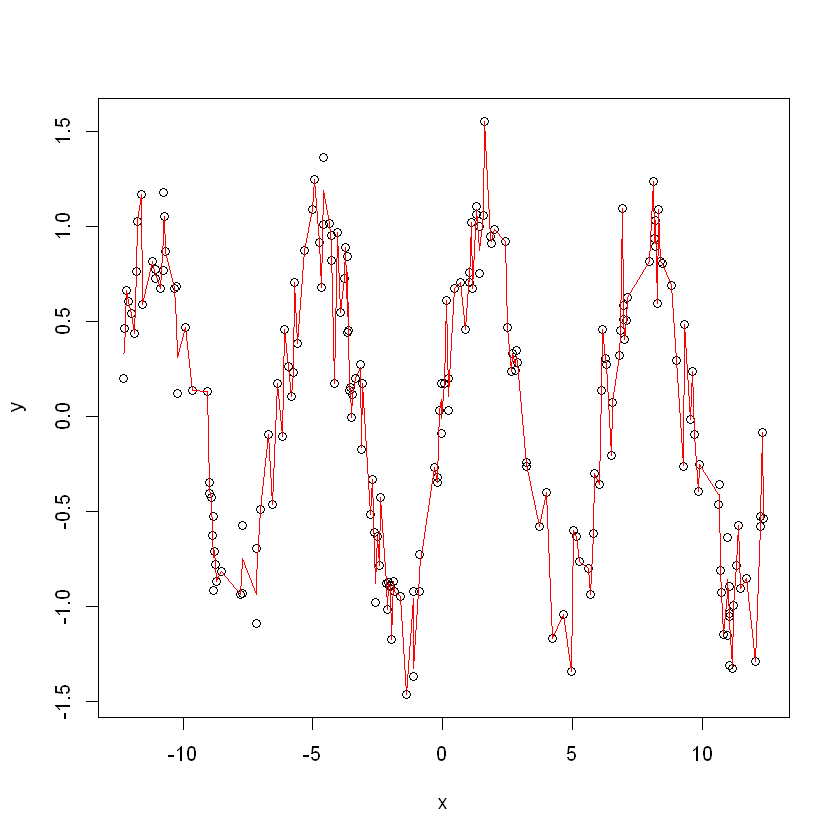

In [14]:
smoothed = locPolSmootherC(x=x,y=y,xeval=x,deg=0,kernel=gaussK,bw=.01)
plot(x,y)
lines(x,smoothed$beta0,col='red')

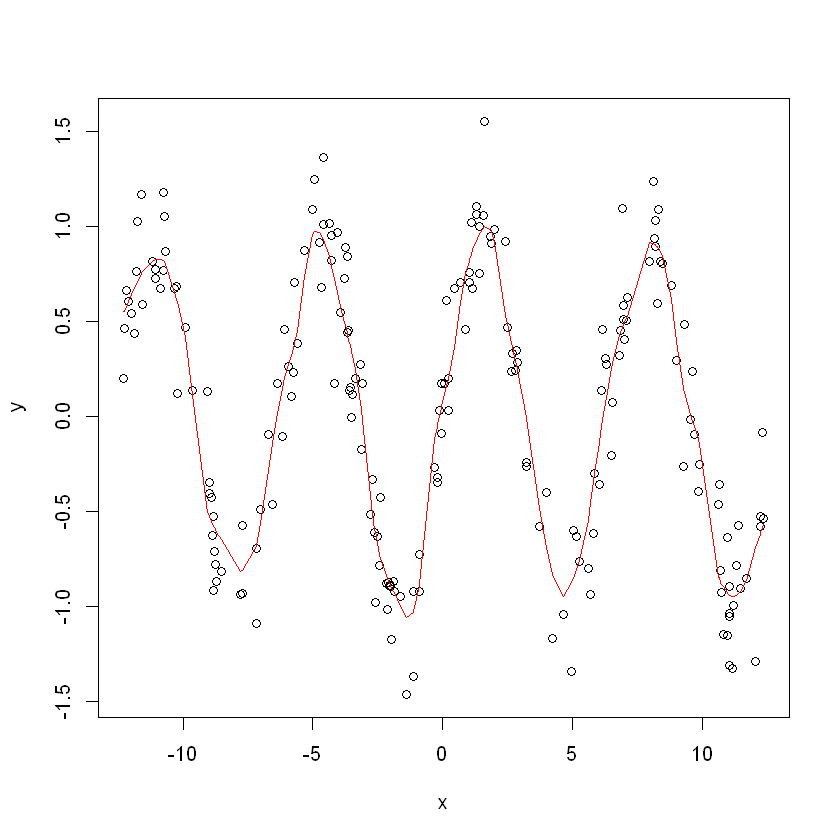

In [15]:
smoothed = locPolSmootherC(x=x,y=y,xeval=x,deg=0,kernel=gaussK,bw=.35)
plot(x,y)
lines(x,smoothed$beta0,col='red')

In [16]:
?regCVBwSelC

regCVBwSelC {locpol},R Documentation
x,x covariate values.
y,y response values.
deg,degree of the local polynomial.
kernel,"Kernel used to perform the estimation, see Kernels."
weig,Vector of weights for observations.
interval,An interval where to look for the bandwidth.


In [17]:
best_bw = regCVBwSelC(x,y,deg=0,kernel=gaussK)

In [18]:
best_bw

[1] 0.3962313

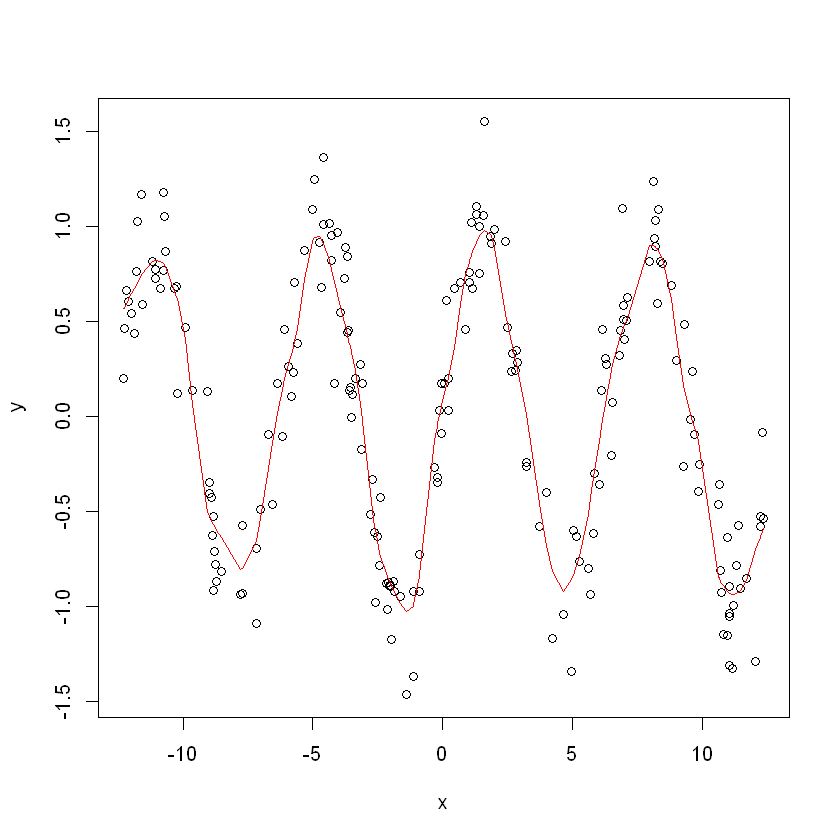

In [19]:
smoothed = locPolSmootherC(x=x,y=y,xeval=x,deg=0,kernel=gaussK,bw=best_bw)
plot(x,y)
lines(x,smoothed$beta0,col='red')